# Chapter 10: Extra Bits WIP

This chapter will give you a short but sweet run-down on various extra features and modules in Python that may be of use to you.

This is certainly not an exhaustive list, but it will give you an idea of what's possible within Python.

## Useful Libraries and Modules

In Chapter 2 we discussed how to import and install different libraries and modules to perform certain tasks for us, but for the majority of this course we haven't made use of them.

There are many, many different libraries out there, but the following is a short list of some of the most useful for certain applications.

#### Plotting 

If you're looking to produce figures to display results, create drawings etc. there are a host of libraries out there, but the most common is the library matplotlib, and the module pyplot. This module can produce a variety of simple and advanced figures, and there is an abundance of guidance online for how to best visualise your data.

Commonly, pyplot is imported in the following way:

       from matplotlib import pyplot as plt

#### Reading, Writing, and Pickling

Often we may be working with a file outside of our script (for example an Excel file engineers have filled inputs into). We might want to 'read' the inputs from that file and use them within our code, and once we're done 'write' our scripts outputs back into the same file, or to a new results file.

There are several Python libraries that can help with this:

	xlwings - This library is great for identifying specific cells in an Excel book and extracting their data. It also 
    has a host of other capabilities
    
	pandas - This library is a hallmark Python library for data analysis, extraction, and manipulation. Great for reading 
    blocks of data from Excel (imagine we have an Excel with a 100 beams of varying lengths), and writing datasets into 
    Excel or csv files etc. (Imagine we want to put the results of each beam check into one file).
	
#### Pickling

The above examples are great when we want interface between Python and third-party files, but when we want Python to interact with other Python files, 'pickling' is often the most efficient option. 

Pickling takes a variable, object, list, dictionary, etc. and 'serializes' it (converts it to static binary) to a new file. In another Python script, we can call this pickled file, and it will be deserialized into our new script. The benefit of this the deserialized version will behave in exactly the same way as it is defined in the original Python script, with no alterations.

Imagine we want to define several beams and properties, and want to assess them in a separate script. Now imagine the assessment criteria may change several times, but the beams aren't going to change. Instead of having to run the beam definition script and import it into our assessment script every time we change the assessment, it may be more useful to 'freeze' the beam definitions in a pickled file, which our assessment script can grab at any time and run from.

There are two main libraries for pickling, joblib and pickle. Both work in very similar ways. To use either of them to pickle an item, your scripts will look something like this:


**joblib**

In [ ]:
import joblib

# Pickle item
joblib.dump(item_to_pickle, 'name_of_file.pkl')

# Import pickled item
new_name_of_item = joblib.load('name_of_file.pkl')

**pickle**

In [ ]:
import pickle

# Pickling item
with open('name_of_file.pkl','wb') as file: # 'wb' tells the function it is in write mode
    pickle.dump(item_to_pickle, file)

# Importing pickled item
with open('name_of_file.pkl','rb') as file: # 'rb' tells the function it is in read mode
    new_name_of_item = pickle.load(file)

**Note: Python will automatically try and read and write from the same folder that your script is in. To override this, type the file path in front of the file name as so:**

In [ ]:
joblib.dump(item_to_pickle, 'file_path/name_of_file.pkl')

More on files paths and folders later in this chapter.

#### Machine Learning

For machine learning applications such as regression or classification, the library sklearn is your friend. More on this coming soon.

## Data Manipulation

In Chapter 3 we explored the different types of data storage in Python (lists, tuples, dictionaries). These data stores can be manipulated in a number of ways for a variety of helpful features. This section will go over some key features.

For the purposes of this section, we will work with the list below. Don't worry about the details of generating this list.

In [ ]:
import random as r

our_list = [r.randint(1,1500) for i in range(50)]
print(our_list)

Often we might want to know how many items are in our datastore. The len() function does this for us.

In [ ]:
print(len(our_list))

If we want to know the minimum or maximum value in the datastore, use:

In [ ]:
print(min(our_list))
print(max(our_list))

**Note: Max and Min may be applied to strings, where the method looks through each string letter by letter and arranges with 'z' as a maximum and 'A' as a minimum. Lowercase letters are considered higher than uppercase.**

Our list is jumbled up and random, luckily Python has methods to sort lists.

In [ ]:
our_list.sort()
print(our_list)
our_list.sort(reverse = True)
print(our_list)

**Note: By default sort arranges in ascending order.**

You might have noticed the sort function changes our_list permanently. This is because it edits it 'in-place'. Another function 'sorted' can be used if we want to create a separate list and keep our original unchanged.

In [ ]:
import random as r

our_list = [r.randint(1,1500) for i in range(50)]
print(our_list)

new_list = sorted(our_list)
print(our_list)
print(new_list)

Say we have instead a dataset of items all with different attributes, such as a dictionary. We can sort by a particular key of the dictionary. Let's take a look at the dictionary we defined in Chapter 5, edited a little. It is now a dictionary containing a list of dictionaries. We may only sort the list, not the dictionary.

In [ ]:
beams = {'Beams' : 
         [{'Name' : 'Arnold',
            'Span' : 12,
            'Loading' : 43, # kN
            'Rest of deflection equation' : 3}, # mm/kN
            {'Name' : 'Sylvester',
            'Span' : 3,
            'Loading' : 13,
            'Rest of deflection equation' : 5},
            {'Name' : 'Jason',
            'Span' : 5,
            'Loading' : 6,
            'Rest of deflection equation' : 7},
            {'Name' : 'Robert',
            'Span' : 12,
            'Loading' : 1,
            'Rest of deflection equation' : 3000},
            {'Name' : 'Curtis',
            'Span' : 50,
            'Loading' : 2,
            'Rest of deflection equation' : 1}]}

First we need a function that will get the feature we want to sort by ('Span').

In [ ]:
def getspan(list):
    span = list['Span']
    return span

Now we can create a new list that sorts our dictionary list by 'Span'. Our key function will get the span of each beam in the list, and rearrange the list by span.

In [ ]:
s_beams = sorted(beams['Beams'], key = getspan, reverse = True)  
print(s_beams)

#### pandas and numpy

Pandas and numpy are wonderful libraries we can import to work with datasets. There are many features within them that we can use, such as removing rows from our datasets, filling in any blank values, finding aggregates such as the mean or median of our dataset columns or rows etc etc. This section will not go into detail on these features, but just be aware that if there is a task that involves creating, manipulating, or cleaning a large dataset, pandas and numpy may be the tool for the job.

## List Comprehension

If you have a sharp memory, you may remember while we were investigating for loops in Chapter 4, it was said that there was a far easier version of our example. If you have even sharper eyes, you will have seen this method used earlier in this chapter. If not, don't worry, here's a refresher.

### _Example_

I have a set of beam depths. A hooligan with a chainsaw has sliced each beam in half, so I need to update the list to reflect that. Even though my list is short and I could just rewrite it, I make silly errors all the time, so recalculating each one by hand will likely end up wrong.


In [ ]:
Beam_depths = [200, 430, 654, 76, 550] # mm

New_beam_depths = [] 

for beam in Beam_depths: 
    beam = beam/2
    New_beam_depths.append(beam)

print(New_beam_depths)

**Note: There is a far easier way of doing simple for loops on lists, which will be covered in Chapter 9 (now).**

That far easier way is called list comprehension. List comprehension is a way of working with lists that is extremely concise when performing very simple repetitive loops such as the one above. It can be tricky to read if you attempt more complicated examples however, so sometimes a fully written for loop is recommended.

Let's try the above example using list comprehension.

In [ ]:
Beam_depths = [200, 430, 654, 76, 550]

New_beam_depths = [beam/2 for beam in Beam_depths]

print(New_beam_depths)

In just one line, we have created a new list by looping through a previous one and performing an action. List comprehension can be a very powerful tool in our arsenal for writing concise code.




## Debugging

If you write a script, likelihood is it's going to break. Debugging is an essential part of any programmer's skillset to identify and fix errors in their code.

First things first, whenever your code breaks it will produce an error message describing the reason it can no longer continue. There are many, many, many different reasons for a code to break, so we won't go through them all. 

90% of the time it will be due to syntax errors such as a missing ':', unclosed bracket, or unindented line of code. 

Other major errors will be simple human error of mistyping, particularly if you are reading values from a user-created Excel, so ensure inputs are correctly formatted, and if possible write your script such that it will reduce the chance of human error. 

Useful functions to apply to your inputs once Python has read them are:

    input.upper()     Converts input strings to UPPERCASE, so error in case won't affect rest of code.
    input.strip()     Removes leading or hanging white space from input.

### _Example_

In [ ]:
input = "uSer inPuT    "
input.upper()
input.strip()
print(input)

Another common error is simply that you're code isn't doing what you think it is, particularly when reading lists/dictionaries and creating multiple variables to use later on. 

For example, you might think you're grabbing the 5th item in a list but for whatever reason you're code is grabbing the 6th, and so when you use that variable in a calculation or function later on, the output isn't what you were expecting/correct.

One way of dealing with these kinds of errors is to insert print values as your code executes, so you can see what each variable you're interested in is actually being set to as your code runs.

While this works in many cases, the inclusion of several print statements can make your script messy, and should your code be a relatively long script, it can be quite confusing to trace where each print statement executes and refers to. Reading printed values from the console/terminal of your IDE can be equally frustrating. Fortunately, built-in debugging features contained within VS Code can be of use here.

### Debugging in VS Code

When writing scripts in VS Code (the recommended IDE to be using for HTS projects), there is a section named Run and Debug that can be extremely useful for ensuring your code is operating as expected and catching/correcting any mistakes.

Instead of writing a print function to find what's happening in your code, VS Code allows you to place debugging steps in your code. They are created as below, by clicking just to the left of your code line (or by selecting the appropriate line and pressing 'F9'). In the image below, we have created a debugging step on line 25 of our script.

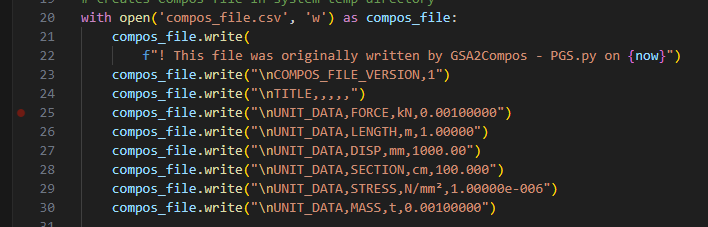

Next, when you wish to test your script, navigate to the 'Run and Debug' tab, and hit 'Run and Debug':

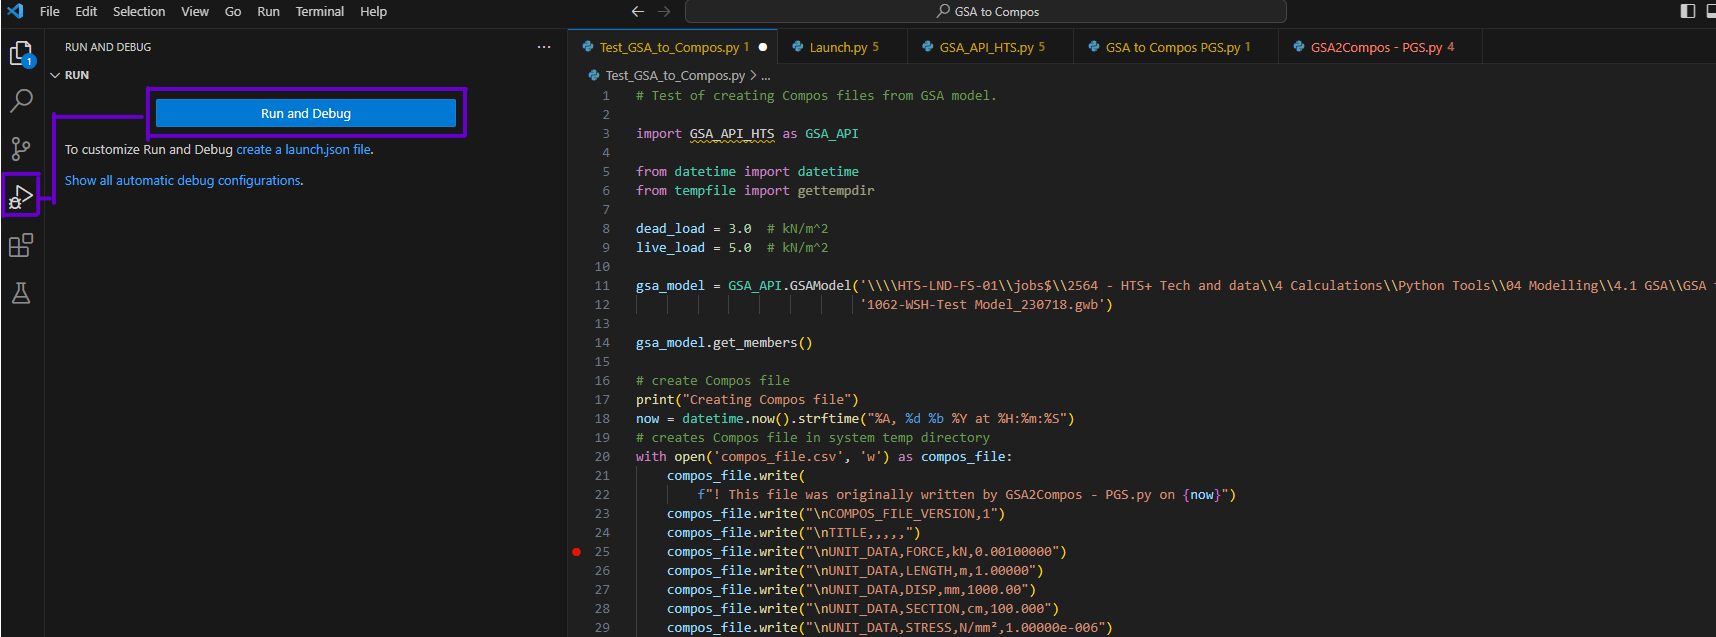

What VS Code will do is run your script up until the point of your debugging step (if there is an error in the code prior to your debugging step it will break as usual) and then pause. All of your script prior to the debugging step will be executed. 

Then, in the Run and Debug window to the left, all the variables, lists, dictionaries, classes etc. created by your script up until that point will be shown (see image below). This can be incredibly powerful to evaluate exactly how Python is interpreting your script/data.

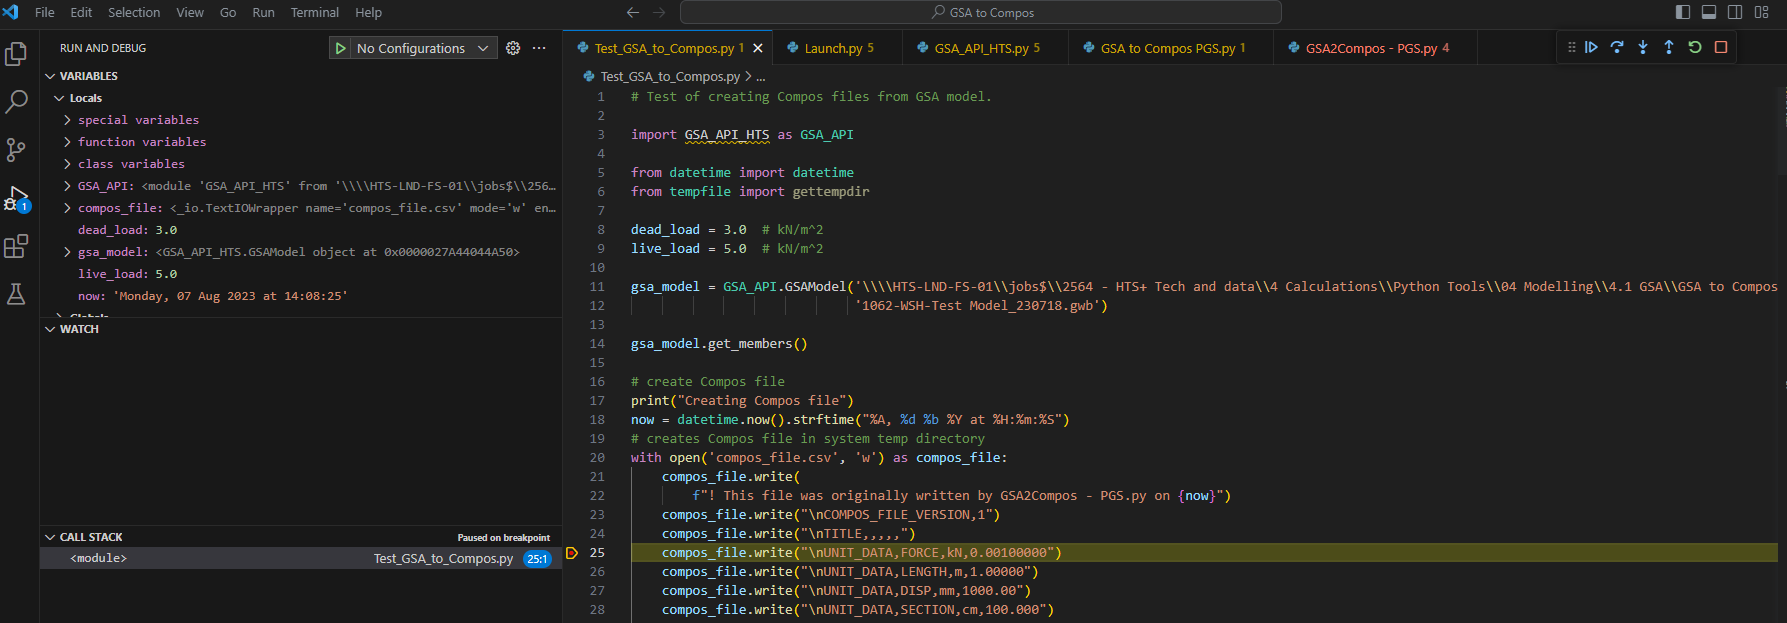

VS Code will also produce a handy debugging remote on your screen, from which you can run your code. If the code is working perfectly fine, you can continue the execution until your next debugging step (or to the end if there are no more debugging steps), or run your script line-by-line to have some granular oversight on how it is working. If the script is not operating how you expect, you can stop the process, or edit the code in real-time and restart the debug process. 

**Note: If your script has an error and breaks, you cannot continue running, you will need to restart the process.**

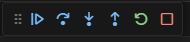

Note: Debugging steps can also be handy to review your code even if it is not breaking. To save memory, once it has finished running VS Code will delete all the variable/list/dictionary/class etc. information set up by your script, so you won't be able to view it. Adding a debug step at the very end of your code (e.g. write a line after your script saying test = 1 and assign it as a debug step) will run your script fully, but keep the variables etc temporarily stored in the sidebar for you to review.

### Try and Except

There may be times when your script has errors, but they don't affect operations later on and you'd like to just keep going rather than fix it then and there. Or often you may have a for loop running through many different items, and you'd rather run through the entire loop and determine all of the error-prone items than fix them one-by-one as the loop iterates through them.

### _Example_

I have a list of beams that I'm am determining the cross-sectional area of, but some have been input incorrectly.


In [ ]:
# [Width, Depth]
beams = [[200, 300],
         [300, 350],
         [530, 320],
         [250, 130],
         [280, 320],
         [100, 880],
         ['str', 650],
         [250, 630],
         [240, 320],
         [230, 'NA'],
         [300, 970],
         [500, 80],
         ['2--', 400],
         [800, 200],
]

Areas = []

for beam in beams:
    Area = int(beam[0])*int(beam[1])
    Areas.append(Area)
    
print(Areas)

As you can see, when the script reaches the 7th beam, it will break.

In cases like these, the try and except commands are very useful.

To execute try and except, you may apply it to the example as below:

In [ ]:
# [Width, Depth]
beams = [[200, 300],
         [300, 350],
         [530, 320],
         [250, 130],
         [280, 320],
         [100, 880],
         ['str', 650],
         [250, 630],
         [240, 320],
         [230, 'NA'],
         [300, 970],
         [500, 80],
         ['2--', 400],
         [800, 200],
]

Areas = []

for beam in beams:
    
    try:
        Area = int(beam[0])*int(beam[1])
        Areas.append(Area)
        
    except:
        print(beam)
        
print(Areas)

Note the use of ':' and the indentation.

Try and except operates similarly to If/Else. What try and except tells Python to do is to first 'try' to execute what you include in the indentation below 'try:', but if there is an error, instead of breaking, Python will run the code in the 'except' part of the statement instead.

So in our example, when the loop comes across a faulty input in beams[], instead of stopping, it will print the faulty beam out and move onto the next one. This is very handy for identifying which areas need fixing all at once, particularly when working with hundreds of inputs where scanning the database by eye would be very prone to error.

**Note: when using the 'try' statement, an accompanying 'except' statement must be defined. If you have nothing you'd like to do with that 'except' statement, you can just type 'pass' below it and Python will just skip to the next operation without doing anything, but the 'except' statement must be there for 'try' to work.**




## Combinations/Iterations

Many of the tools we will be developing are centred around automation and iteration. A very useful library for iterative purposes is itertools. Itertools contains many functions, often dealing with combinations of various inputs (think of examples of like finding how many different orders a set of cards can be shuffled into). Info on several of these combination functions can be found at the link below, but in this course we'll highlight one that may be of particular use, itertools.product.

https://learnpython.com/blog/combinatoric-iterators-in-python/

Products is a function that can return all possible combinations of multiple lists.

### _Example_ 

You are creating an iterative tool to design foundation piles, changing the diameter, loading, or depth of each pile and comparing the results of each calculation. In order to do this, you have lists of each diameter, load, and depth you want to test. You need to input the diameter, loading and depth of the pile you wish to calculate each time, and you want to try every combination of these parameters. 

As you can see, this is either a lot of manual work prone to error, or a messy set of for and while loops embedded into one another that's also prone to error and hard to read. This is where itertools.product comes in.


In [ ]:
from itertools import product

diameters = [100, 150, 200, 225, 250, 275, 300]
loads = [500, 700, 800, 900, 1000, 1500, 2000]
depths = [10, 15, 17.5, 20, 22.5, 25]

lists = [diameters, loads, depths]
combinations = list(product(*lists))

print(combinations)
print(len(combinations))

We just produced an easy list of all 294 combinations in just a few lines of code. This list can then be manipulated and extracted from. For example, we could quickly create a dictionary of all the different combinations nicely labelled for use later.


In [ ]:
from itertools import product

diameters = [100, 150, 200, 225, 250, 275, 300]
loads = [500, 700, 800, 900, 1000, 1500, 2000]
depths = [10, 15, 17.5, 20, 22.5, 25]

lists = [diameters, loads, depths]
combinations = list(product(*lists))

print(combinations)
print(len(combinations))

combination_dict = {}
number = 1
for i in combinations:
    combination_dict[f'Comb {number}'] =  {'Diameter' : i[0],
                                            'Load' : i[1],
                                            'Depth' : i[2],                                           
                                            }
    number += 1
    
      
print(combination_dict)

Note: For your computer's sake, be wary when using functions in itertools on overly long lists, as the number of possible combinations could be astronomical. For example, the combinations of a pack of cards is 52!, or 8 x 10^67. 

In _nanometres_, that would take us to the furthest observable point of the universe and back **1 x 10^32 times!!** (Admittedly not a particularly comprehensible stat but I couldn't think of anything bigger to compare it to. Sidenote: how on earth do people cheat at cards with that many variations?)

**Note: itertools.products produces the results as tuples which, as described in Chapter 3, cannot be manipulated as freely as classes. If intending to change certain numbers in your combinations later on, some manipulation will be required.**


## Accessing Directories

A directory is Python's term for a folder. When working with directories, the modules you will be interested in are 'os' and 'sys', imported as follows:

	import os
	import sys

There is various documentation relating to these modules online if you're interested, we will only go through a few in this section. Just know that invariably you will need these libraries if you're working with directories or file paths.

To find the filepath of the python script you are working on, use the command:

	os.getcwd()

To find the filepath of the directory your Python file is in, use:

	os.path.dirname(__file__)

Python will automatically be working from the directory that the main script you are running is in. To change the directory to be elsewhere, you may use:

	os.chdir('file/path/to/directory/you_want_to_work_in')
	
To create a folder in your current working directory, use:

	os.mkdir('file/path/new_folder_name')
	
	
### File Paths in Python

Various functions within Python operate using file paths, such as reading and writing files to and from different directories, so it's useful to understand how they work. 

Python can work with absolute file paths or relative file paths. An absolute file path is a file path as you know it, being just the full length path to your file.

	\\HTS-LND-FS-01\jobs$\2564 - HTS+ Tech and data\4 Calculations\Python Tools\ 

Beware of the \ that File Explorer automatically gives you when you copy a link. In VS Code, this is interpreted as what is known as a 'string literal', and effectively it indicates in Python to end a string. Most of the time, you will be typing file paths into python as strings, so this will break your code. When typing a file path, replace the '\' with '\\' or '/' to ensure it works.

Also note that file paths begin with a double slash.

**Note: Where possible, use the commands in os and sys to access filepaths, rather than typing absolute file-paths into scripts yourself. This will improve the portability of your code and reduce the amount of manual editing required.**

Relative file paths are a little simpler. They allow you to access a file in a folder by 'working backwards' from your current directory. Useful if you know the overall framework of a folder system someone using the script will be working in but don't know the exact file path (eg. Because they are working from their personal drive and not the company shared drive).

Relative file paths are written as follows:
	
	'path/to/mainscript.py/../../../new_python_script.py'

This path will access 'new_python_script', which is saved 3 folders 'back' from your main script. Each '..' indicates to Python to step backwards by one folder. See the illustration below.

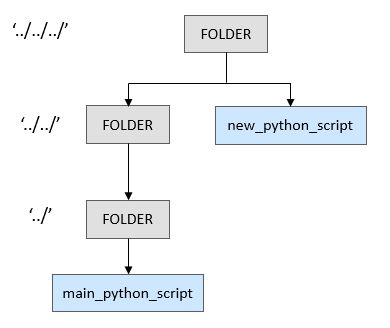

**Note: Because file paths are often input as strings, they obey the same rules for slicing, adding to, or removing from a string. This can be particularly useful when creating new files using a file path.**

### Joining filepaths and realpath

When joining filepaths, DO NOT CONCATENATE STRINGS. E.g. do not use path = 'folder/path' + '/filename.py' to create your new path.

This is poor practise as not every computer interprets paths the same way (they don't all use / to indicate separation for example). Therefore when you add '/filename.py' and try to run this script on a machine which doesn't read paths this way, your code will break.

Instead, use os.path.join() as so:

	folderpath = os.path.dirname(__file__)
	path = os.path.join(folderpath, 'filename.py')

This will create and join your path in the correct way appropriate to the machine you run the script on, increasing the portability of your code.

Another useful feature is os.path.realpath(). Remember our previous relative path file? 

	'path/to/mainscript.py/../../../new_python_script.py'

A real example of this (using the code shown) is:

	test = os.path.join(os.path.dirname(__file__), '..')
	test2 = os.path.join(test,'Steel Connection Designer.xlsm')
	print(test2)

	Output : 'J:\\2564 - HTS+ Tech and data\\4 Calculations\\Python Tools\\03 Steel\\3.2 Steel Connection Designer\\Fin Plate Designer\\..\\Steel Connection Designer.xlsm'

If I were to try and find this file in the File Explorer, my 'real path' that I would use would be:

	'J:\\2564 - HTS+ Tech and data\\4 Calculations\\Python Tools\\03 Steel\\3.2 Steel Connection Designer\\Steel Connection Designer.xlsm'

As you can see, the path I've created in Python, while it works, is difficult to interpret as a user, particularly if it became more complicated.

Luckily, os has a function 'realpath' that solves this for us:

	test3 = os.path.realpath(test2)
	print(test3)

	Output: '\\\\HTS-LND-FS-01\\jobs$\\2564 - HTS+ Tech and data\\4 Calculations\\Python Tools\\03 Steel\\3.2 Steel Connection Designer\\Steel Connection Designer.xlsm'

It converts it into a slightly different format, but as you can see the path is now far more legible and interpretable.

**Note: Python will interpret the test2 path without issue, realpath just makes code more understandable and therefore easier to interpret issues with, and so is good practise.**

### Importing Functions from Other Python Files
	
When working on more complicated tools, it can be simpler to spread the Python script across several .py files, instead of one continuous long script. 

For example, you may have several complicated functions and prefer to keep them in a separate 'Functions.py' file, and just call each function when you need it in a simple one-line piece of code in your main file.

Importing functions from other files works the same way as importing any library. If you have a 'Functions.py' file saved in your folder, simply type the following:

    import Functions

Python automatically works from the directory that the script you are running is in, so it can detect any files within that directory very easily. However, if your files are located elsewhere the process is a little more involved, although still simple.

Say we have the directory below and we want to access a file called 'write' in the 'Functions' folder.



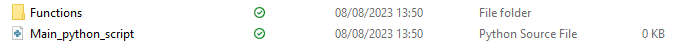

From our main script, Python is aware of the Functions folder, as it's in the same directory as our main script, but we can't simply type 'import write' to get the file we need. Instead, we type:

    import Functions.write

It works similarly to taking an individual module from a library.

**Note: When planning to access files in this way, make sure they are saved as single-word files without white spaces, similar to how you would define a variable. Otherwise, they cannot be called.**

**Note: When accessing functions from other directories, the directory you are accessing must contain a blank Python file named '__ init __.py', as shown below.**

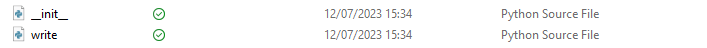

If we wanted to use a function inside 'write' called 'write_a_book', we would call it like any function from a library:

    write.write_a_book()

### But what if you want to access files in a completely different directory?

The way 'import' works is that Python will scan it's system path to see if the library you are looking for exists. This system path is just a list of locations that Python will look in. 

First, Python looks into its own set of libraries and imports the library if it exists there. When you install a new library such as pandas to your system, it is added into Python's set of libraries.

If it can't find the library however, and this is the only location the system path has to look in, an error will occur. Fortunately, if we want to access our own created files, we can add locations to the system path using the 'sys' module:

	import sys
	
	sys.path.append('file/path/to/location_we_want_to_look_in'
	
Python will now be able to 'see' all the files in this appended directory, and they can be imported as normal.

## Launch Scripts

How to keep Python tools simple to run.

As you are aware after this journey through Python, running Python files can be quite an involved task, and without familiarity with the intricacies involved it is easy to break tools. If we want someone to use our tool that doesn't have any knowledge of Python, this can be tricky.

Additionally, with very long scripts or multiple scripts working together at once, it can become complicated to see what a tool is doing in a relatively digestible way, and if you have a finished tool and just wish to run it you don't need to see every detail of the code.

For now, HTS' approach to these issues is a 'launch' script.

The idea of a launch script is to contain within one script everything a user would need to run a tool, and all they need to do is press run or enter a very minimal amount of project specific information and hit run.

Instead of copying entire tool folders to each user's project, only the launch script should be required, and it should access the rest of the tool within that launch script, to minimise unnecessary replication across our network.

The launch script will be different for every Python tool, but generally it will:

- Import every function or script related to the tool from the tool's folder.

- Run each script/function in a clear and digestible manner.

- Create and save files to the project folder as necessary.

- Give the user feedback while the tool is running to indicate what stage it is at.

- Be designed to not alter the source tool files.

## Running Python from Excel

How to run a Python script from Excel using buttons and macros.

For a truly usable tool, having to copy Excel files and all the corresponding Python files or even just the launch file can be  a hassle. Additionally, having engineer's manipulate the source Python files can be a risk to the whole tool. Giving our engineer's the ability to copy just the Excel script they need, and run the tool in a clear and easy way within Excel itself can be invaluable.

With this capability, we can utilise Excel's ease of use, visual clarity, and familiarity with Python's processing power.

In this section, you will learn how to embed a Python script within your Excel document using a Visual Basic (VBA), Excel's programming language.

Note: This feature may not work on everyone's devices depending on their firewall/security settings.

### Step 1 - Add developer tab to your Excel

To add and edit macros in Excel, you'll need to add the developer tab to your ribbon. This can be done by following File > Options > Customize Ribbon > Tick Developer

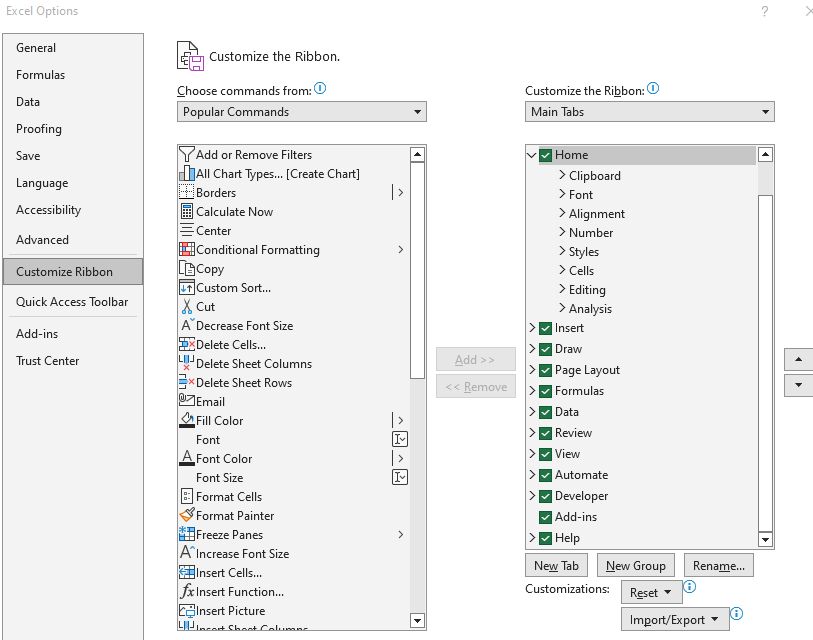

### Step 2 - Add your button

In the Developer tab, navigate to Insert > Button (Form Control). Then just draw your button where you would like it in your Excel.

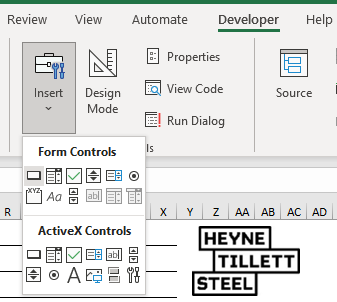

### Step 3 - Name Macro

Name your macro with something easy and memorable. Click 'New' to create this macro. This will open a Visual Basic window where you can write and edit your macro.

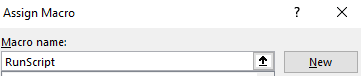

### Step 4 - Code your Macro

The code for running a Python script with an Excel macro is below. Note, this is Visual Basic code, not Python, so it will not run in your Jupyter Notebook, but has been placed in a code-space for clarity.



In [ ]:
Sub Your_Macro_Name()
    Dim objShell As Object
    Dim PythonScript As String
    Dim command As String
        Set objShell = CreateObject("WScript.Shell")
        PythonScript = """file/path/to/your/script.py"""
        command = "python " & PythonScript
        
        objShell.Run command
        Application.Goto Reference:="Macro_name"
End Sub

We'll run through this line by line:

In [ ]:
Sub Your_Macro_Name()

This initialises your macro and tells VBA that indented code below belongs to this macro.


In [ ]:
    Dim objShell As Object
    Dim PythonScript As String
    Dim command As String

This sets up the items you'll need later. objShell is an object that will be assigned methods later, and PythonScript and command are the strings you will be entering into these methods.


In [ ]:
        Set objShell = CreateObject("WScript.Shell")

This assigns your object to WScript.Shell, a pres-set class in VBA that contains what you'll need to run your script.

In [ ]:
        PythonScript = """file/path/to/your/script.py"""
        command = "python " & PythonScript

This is where you indicate which script you want to run using its file path. Note the """ ensures VBA will still recognise the full file path even if spaces are present in it. 

Command concatenates your file path with "python " at the start, which tells VBA that the script it will run is a Python script, and so it will access the Python executables in your drive.

In [ ]:
        objShell.Run command

This runs your "python file/path…" using the object set up earlier.

In [ ]:
        Application.Goto Reference:="Your_Macro_Name"

This line is required to link your button to the macro you've just written.

In [ ]:
End Sub

This tells VBA to complete the macro and finish execution.

Congratulations, you've made a button that will run your script all from your Excel, no need to keep copying over the same Python scripts every time you need to use a tool now !

### Step 5 - Edit your button

To make it even better for other engineers to use, you can right-click your button and edit the text to make it clear what it's function is. Here's an example from HTS' Timber Connection Designer:

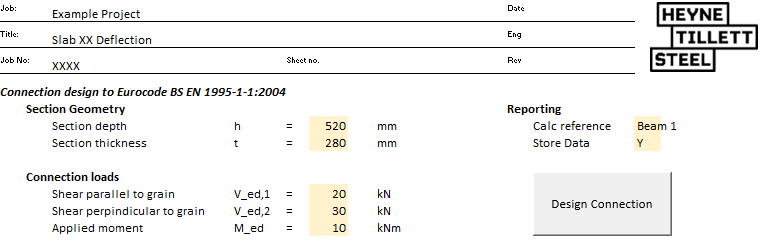

And now the engineer's using this tool will praise your name for making it so easy for them (maybe, maybe not)

## To be continued...